# Exercises week 1

## Exercise 2.1: Error in MC

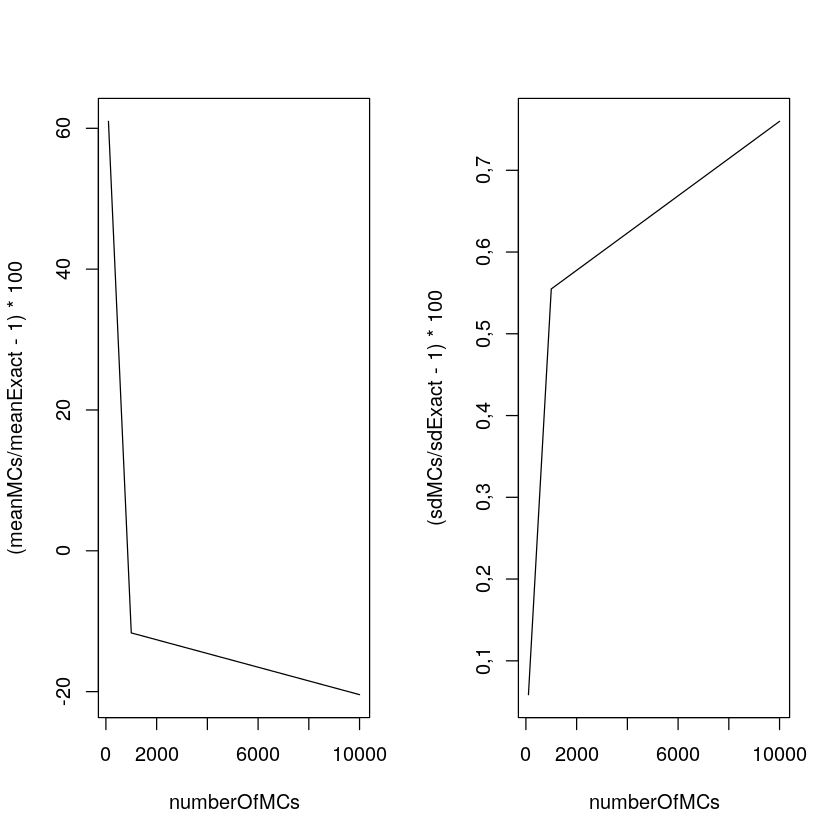

In [50]:
xsi <- .005;
sigma <- .05;

numberOfMCs = c(100, 1000, 10000);

meanExact <- exp(xsi + sigma^2/2)-1;
sdExact <- exp(xsi + sigma^2/2)*sqrt(exp(sigma^2) -1);

meanMCs = c();
sdMCs = c();

par(mfrow = c(1,2));
for( i in 1:length(numberOfMCs)){
    eps <- rnorm(numberOfMCs[i]);
    R <- exp(xsi + sigma*eps)-1;
    meanMCs[i] = mean(R);
    sdMCs[i] = sd(R);
}

plot(numberOfMCs, (meanMCs/meanExact-1)*100, type='l');
plot(numberOfMCs, (sdMCs/sdExact-1)*100, type='l');

Less variation in variance than in average.

## 2.2 QQ-plot: Compare pdf's.

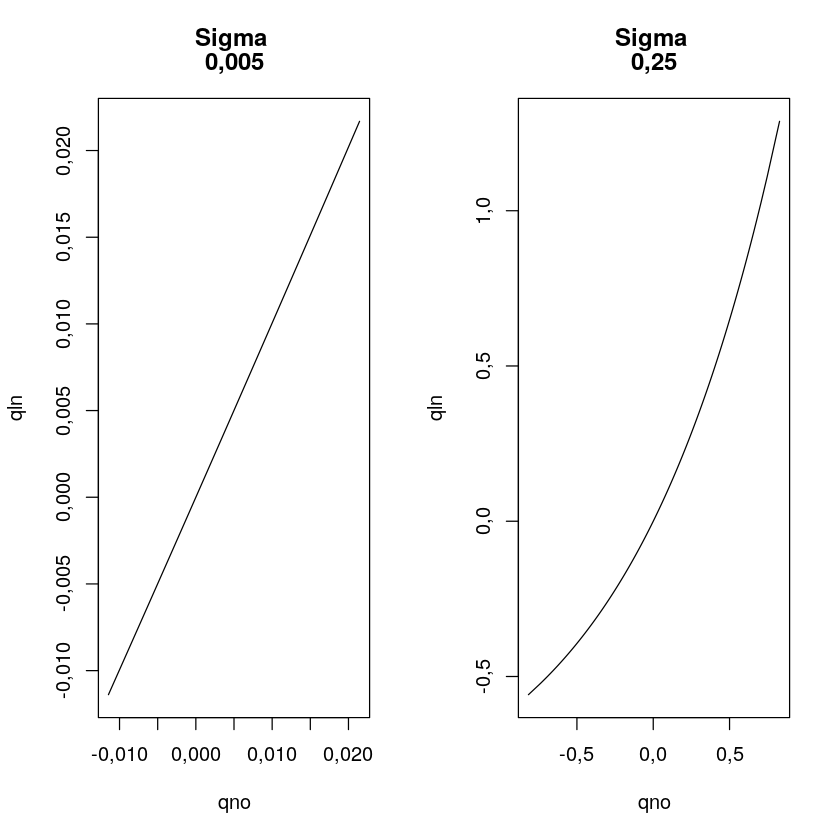

In [48]:
xsi = .005
n <- 1000;
u <- (1:n - .5)/n; # Percentages (area below pdf)
sigmas = c(.005, .25);

par(mfrow = c(1, 2))
for (i in 1:length(sigmas)){
    qno = xsi+sigmas[i]*qnorm(u);
    qln = exp(qno) - 1;
    plot(qno, qln, type='l');
    title(c('Sigma ', sigmas[i]));
}

Linear relation in 1st plot, quadratic in 2nd plot. 
<br>

<mark>    
Is there anything more to get out of the plots? <mark>
    <br>
    
<mark>I think it is not MC. The distribution is known and inversion is used.

## Exercise 2.4 Q-Q plot with MC

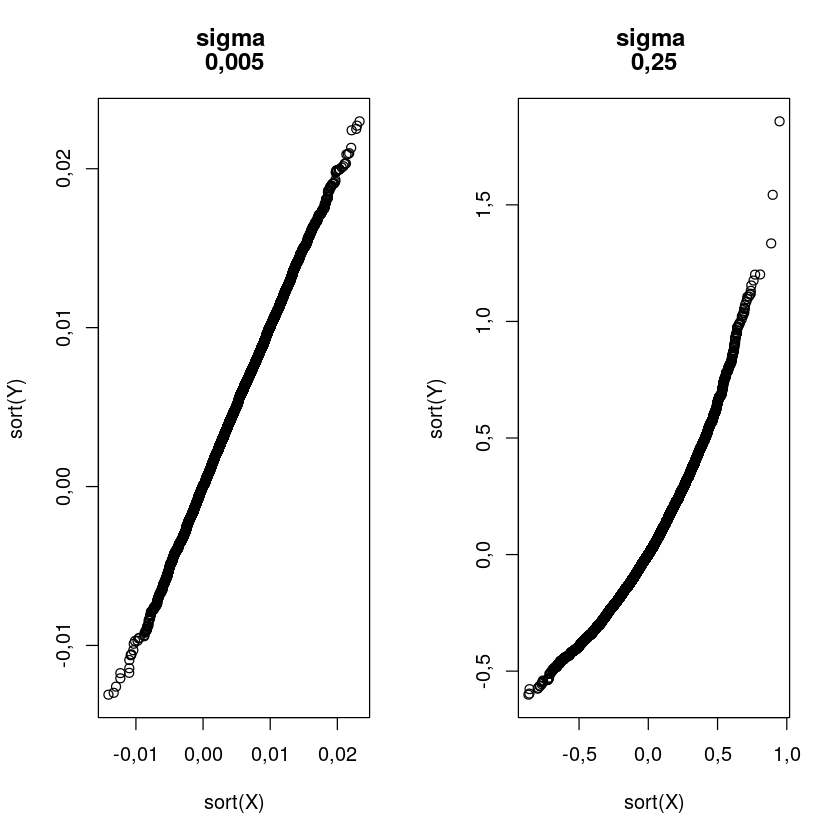

In [49]:
m <- 10000;
par(mfrow = c(1,2));
for (i in 1:length(sigmas)){
    X = rnorm(m, xsi, sigmas[i]);
    Y = rlnorm(m, xsi, sigmas[i]) - 1;
    plot(sort(X), sort(Y));
    title(c('sigma ', sigmas[i]));
}

### Idea behind method
1) Compute the random variables
<br>
2) Sort the random variables
<br>
3) Plotting the sorted random variables from two distributions agains each other is the same as a Q-Q plot, since the sorting of the random variables implicitely construct a CDF (u with the books notation).

### Difference from previous Q-Q method:

1) Did not have to invert a pdf, but we still use a pdf.
<br>

<mark> Is there anything else?

## Exercise 2.5 Estimating PDF

In [36]:
bws <- c(.005, .012, .018);
m <- 1e6;
sigma <- .05;
xsi <- .005;
R = rlnorm(m, xsi, sigma) - 1;

Make estimate of a density function based on only a few samples of the real density function derived above.

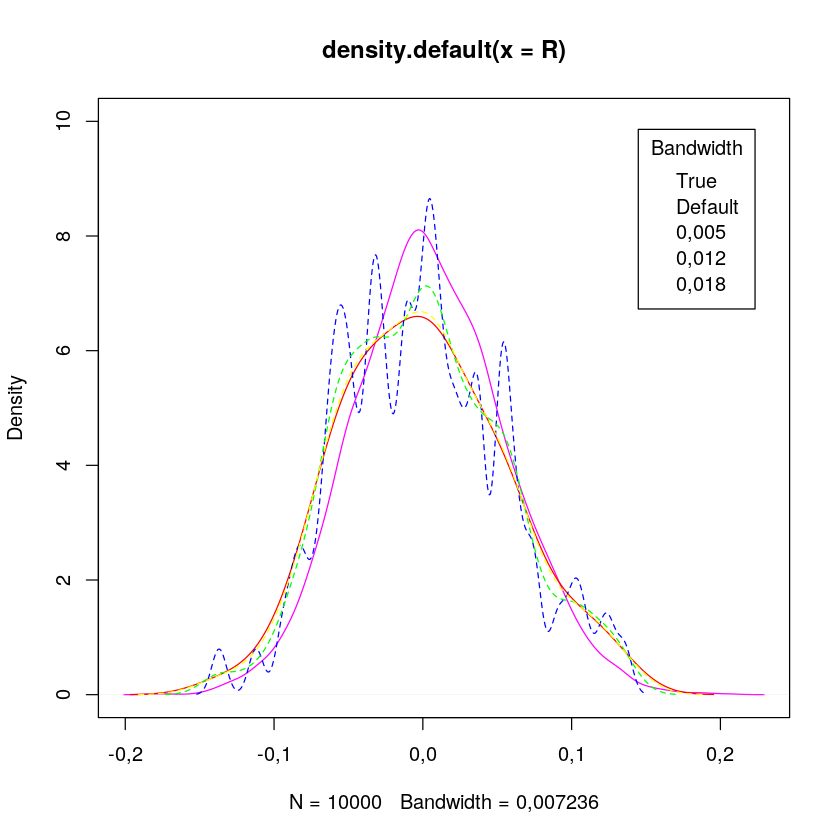

In [77]:
col_list <- c("magenta", "red", "blue", "green", 'yellow')
legends = c("True", "Default", .005, .012, .018);

plot(density(R), ylim = c(0,10), col = col_list[1]);
d = density(R[1:100]);
lines(d$x, d$y, col = col_list[2]);


for ( i in 1:length(bws)){
    d = density(R[1:100], bw = bws[i]);
    lines(d$x, d$y, col=col_list[i+2], lty=2);
}
legend("topright", inset=.05, title="Bandwidth", legend=legends, col = col_list);

Smaller parameter -> More bumpy, more volatility<br>

Usage: <mark>Earlier we used the normal distribution when running MC simulations for calculating statistics such as mean and for computing the percentiles. In reality we don't know the distribution. Hence we can estimate the pdf. This estimated pdf can then be used in MC simulations. <mark> Say we have a few observations of a random variable and that we don't know its pdf. Then we can estimate the pdf.

## Exercise 2.6 Estimation quantile

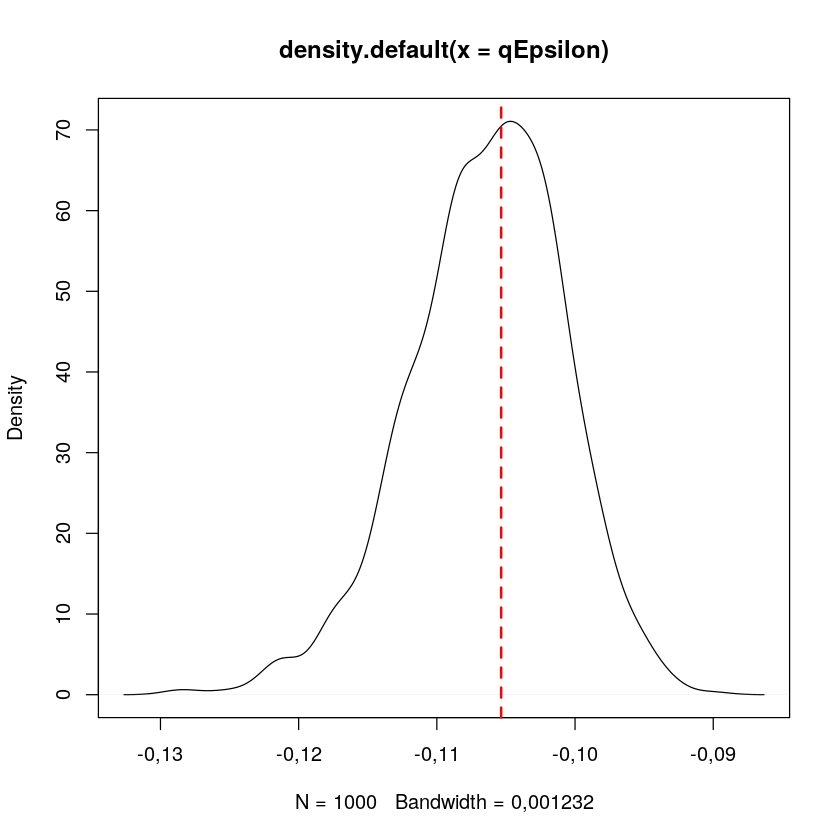

In [121]:
m = 1000 # Simulations for quantile simulation exercise 2.1
mb = 1000 # Number of MC cycles with m simulations each
xsi = .005
sigma = .05
epsilon = 0.01

set.seed(41)

X  = rnorm(m*mb, xsi, sigma)
R  = matrix(exp(X)-1, m, mb) # m rows, mb columns. Each column is 1 MC experiment
qEpsilon = apply(R, 2, sort)[epsilon*m,] # Identifies the value closest to the wanted percentile

Exact = exp(xsi + sigma*qnorm(epsilon))-1 # See exercise 2.2 above, qnorm is the inversion 
plot((density(qEpsilon)), col='black')
abline(v = Exact, lty=2, lwd=2, col="red")

MC fits the exact OK.